In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 1D Discrete Fourier Transform (naive)

In [2]:
def dft(x):
    x = x.copy()
    x = np.asarray(x, dtype=complex)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [3]:
def inverse_dft(x):
    x = np.asarray(x, dtype=complex)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = (1/N) * np.exp(2j * np.pi * k * n / N)
    return np.dot(M, x)

#### Time Complexity $O(N^2)$
#### Space Complexity $O(N)$

## 2D Discrete Fourier Transform (naive)

In [4]:
def dft2(x):
    x = x.copy()
    x_trans = x.transpose()
    x_col_transformed = np.asarray(x_trans, dtype=complex)
    for n, col in enumerate(x_trans):
        x_col_transformed[n] = dft(col)
    x_col_transformed = x_col_transformed.transpose()
    x_transformed = np.asarray(x, dtype=complex)
    for m, row in enumerate(x_col_transformed):
        x_transformed[m] = dft(row)
    return x_transformed

In [5]:
def inverse_dft2(x):
    x_trans = x.transpose()
    x_col_transformed = np.asarray(x_trans, dtype=complex)
    for n, col in enumerate(x_trans):
        x_col_transformed[n] = inverse_dft(col)
    x_col_transformed = x_col_transformed.transpose()
    x_transformed = np.asarray(x, dtype=complex)
    for m, row in enumerate(x_col_transformed):
        x_transformed[m] = inverse_dft(row)
    return x_transformed

#### Time Complexity $O(N^2)$
#### Space Complexity $O(N)$

### Case 1

In [6]:
x = np.random.random(1024)
np.allclose(dft(x), np.fft.fft(x))

True

### Case 2

In [7]:
x = np.random.random(1024)
np.allclose(inverse_dft(dft(x)), np.fft.ifft(np.fft.fft(x)))

True

In [76]:
image_path = "./images.jpg"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE).astype(float)
width = len(img[0])
height = len(img)
width = width if width == 2**(int(np.log2(width))) else 2**(int(np.log2(width))+1)
height = height if height == 2**(int(np.log2(height))) else 2**int((np.log2(height))+1)
img = cv2.resize(img, (width, height))

### Case 3

In [9]:
np.allclose(dft2(img), np.fft.fft2(img))

True

### Case 4

In [10]:
np.allclose(inverse_dft2(dft2(img)), np.fft.ifft2(np.fft.fft2(img)))

True

## 1D Fourier Transform FFT 

In [40]:
def fft(x):
    x = np.asarray(x, dtype=complex)
    N = x.shape[0]
    
    split_threshold = 16
    
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    elif N <= split_threshold:  # this cutoff should be optimized
        return dft(x)
    else:
        X_even = fft(x[::2])
        X_odd = fft(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        X_even = np.concatenate([X_even, X_even])
        X_odd = np.concatenate([X_odd, X_odd])
        return X_even + factor * X_odd

In [41]:
def inverse_fft(x, norm=True):
    x = np.asarray(x, dtype=complex)
    N = x.shape[0]
    
    split_threshold = 16
    
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    elif N <= split_threshold: 
        return inverse_dft(x)*N
    else:
        X_even = inverse_fft(x[::2], False)
        X_odd = inverse_fft(x[1::2], False)
        factor = np.exp(2j * np.pi * np.arange(N) / N)
        X_even = np.concatenate([X_even, X_even])
        X_odd = np.concatenate([X_odd, X_odd])
        x = X_even + factor * X_odd
        if norm==True:
            x = (1/N) * x
        return x

In [42]:
def fftshift_1d(vector: np.ndarray) -> np.ndarray:
    """
    :param vector:
    :return:
    """
    shift = np.empty(vector.shape, dtype=complex)
    # FIXME the usual swap gives erronous results
    shift[: shift.shape[0] // 2] = vector[shift.shape[0] // 2 :]
    shift[shift.shape[0] // 2 :] = vector[: shift.shape[0] // 2]
    return shift


#### Time Complexity $O(Nlog(N))$
#### Space Complexity $O(Nlog(N))$

## 2D Fourier Transform FFT 

In [43]:
def fft2(x):
    x = x.copy()
    x_trans = x.transpose()
    x_col_transformed = np.asarray(x_trans, dtype=complex)
    for n, col in enumerate(x_trans):
        x_col_transformed[n] = fft(col)
    x_col_transformed = x_col_transformed.transpose()
    x_transformed = np.asarray(x, dtype=complex)
    for m, row in enumerate(x_col_transformed):
        x_transformed[m] = fft(row)
    return x_transformed

In [44]:
def inverse_fft2(x):
    x_trans = x.transpose()
    x_col_transformed = np.asarray(x_trans, dtype=complex)
    for n, col in enumerate(x_trans):
        x_col_transformed[n] = inverse_fft(col, True)
    x_col_transformed = x_col_transformed.transpose()
    x_transformed = np.asarray(x, dtype=complex)
    for m, row in enumerate(x_col_transformed):
        x_transformed[m] = inverse_fft(row, True)
    return x_transformed

In [45]:
def fftshift_2d(matrix: np.ndarray, axis: int = 2) -> np.ndarray:
    """
    :param matrix:
    :param axis:
    """
    i, j = matrix.shape
    shift = np.empty(matrix.shape,dtype=complex)
    if axis == 0:
        shift[: i // 2] = matrix[i // 2 :]
        shift[i // 2 :] = matrix[: i // 2]
    elif axis == 1:
        shift[:, : j // 2] = matrix[:, j // 2 :]
        shift[:, j // 2 :] = matrix[:, : j // 2]
    elif axis == 2:
        shift[: i // 2, : j // 2] = matrix[i // 2 :, j // 2 :]
        shift[i // 2 :, j // 2 :] = matrix[: i // 2, : j // 2]
        shift[: i // 2, j // 2 :] = matrix[i // 2 :, : j // 2]
        shift[i // 2 :, : j // 2] = matrix[: i // 2, j // 2 :]
    else:
        return matrix
    return shift


#### Time Complexity $O(Nlog(N))$
#### Space Complexity $O(Nlog(N))$

### Case 1

In [46]:
x = np.random.random(1024)
np.allclose(fft(x), np.fft.fft(x))

True

### Case 2

In [47]:
x = np.random.random(1024)
np.allclose(inverse_dft(dft(x)), np.fft.ifft(np.fft.fft(x)))

True

### Case 3

In [48]:
np.allclose(fft2(img), np.fft.fft2(img))

True

### Case 4

In [49]:
np.allclose(inverse_fft2(fft2(img)), np.fft.ifft2(np.fft.fft2(img)))

True

### Time Comparison

In [50]:
x = np.random.random(1024 * 4)

In [51]:
%timeit dft(x)

1.11 s ± 21.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [52]:
%timeit fft(x)

12.5 ms ± 107 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [53]:
%timeit np.fft.fft(x)

44.8 µs ± 401 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


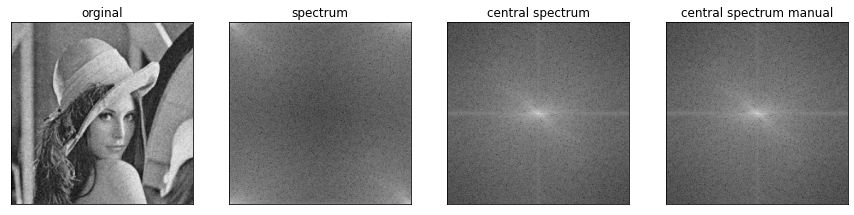

In [77]:
plt.figure(figsize=(15, 5))

# plt.subplot(131), plt.imshow(img, cmap="gray")
plt.subplot(141), plt.imshow(img, cmap="gray")
plt.title("orginal"), plt.xticks([]), plt.yticks([])

img_c2 = fft2(img)
# plt.subplot(132), plt.imshow(np.log(1 + np.abs(img_c2)), cmap="gray")
plt.subplot(142), plt.imshow(np.log(1 + np.abs(img_c2)), cmap="gray")
plt.title("spectrum"), plt.xticks([]), plt.yticks([])

img_c3 = np.fft.fftshift(img_c2)
# plt.subplot(133), plt.imshow(np.log(1 + np.abs(img_c3)), cmap="gray")
plt.subplot(143), plt.imshow(np.log(1 + np.abs(img_c3)), cmap="gray")
plt.title("central spectrum"), plt.xticks([]), plt.yticks([])

# FIXME shifting manually
img_c4 = fftshift_2d(img_c2)
plt.subplot(144), plt.imshow(np.log(1 + np.abs(img_c4)), cmap="gray")
plt.title("central spectrum manual"), plt.xticks([]), plt.yticks([])

plt.show()


##  Denoising

In [59]:
image_path = "./images.jpg"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE).astype(float)
width = len(img[0])
height = len(img)
width = width if width == 2**(int(np.log2(width))) else 2**(int(np.log2(width))+1)
height = height if height == 2**(int(np.log2(height))) else 2**int((np.log2(height))+1)
img = cv2.resize(img, (width, height))

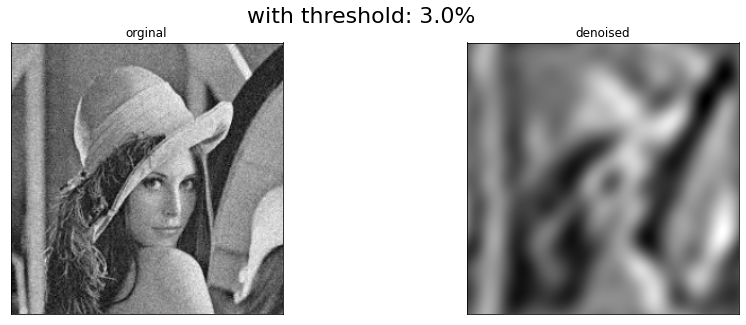

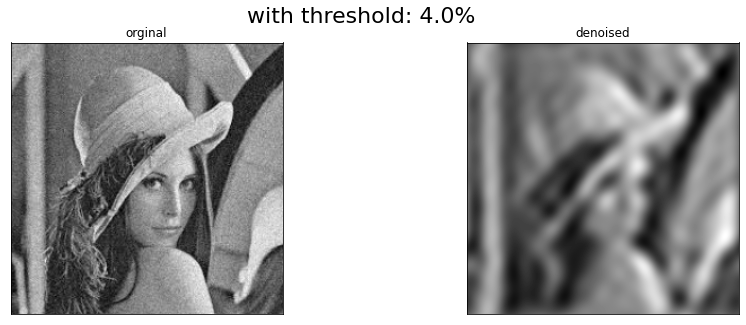

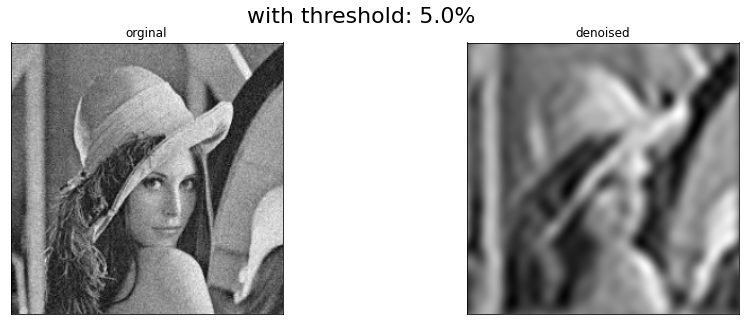

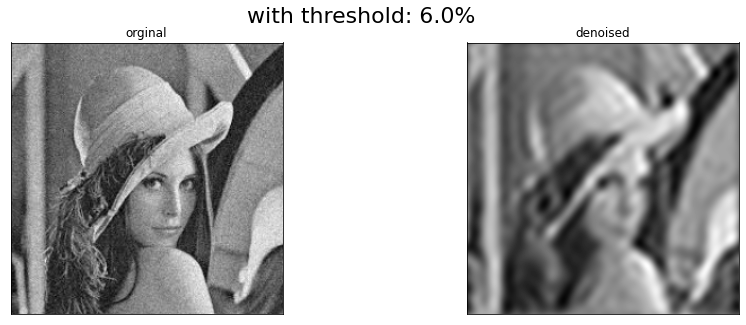

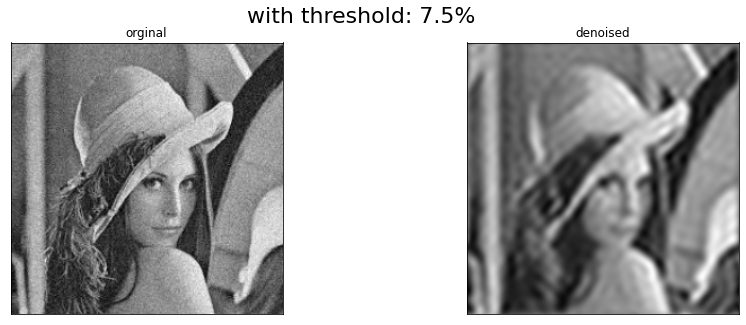

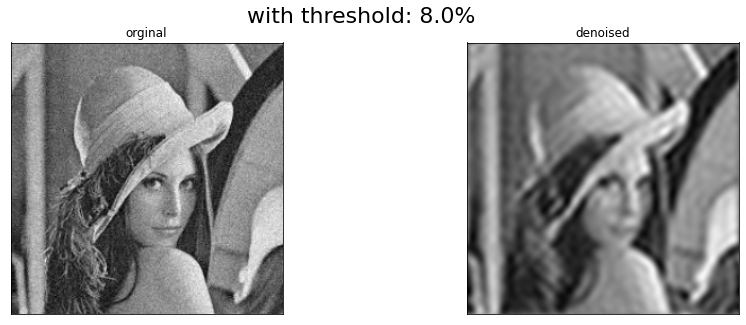

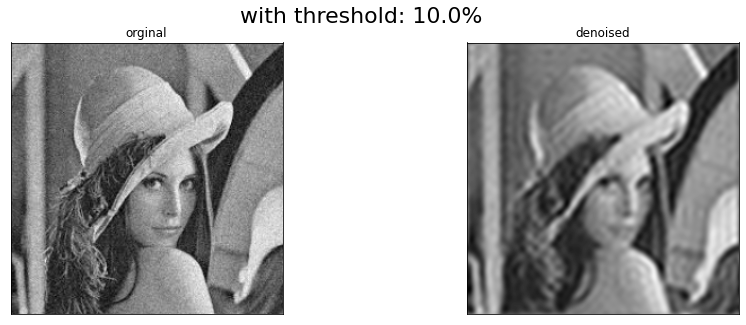

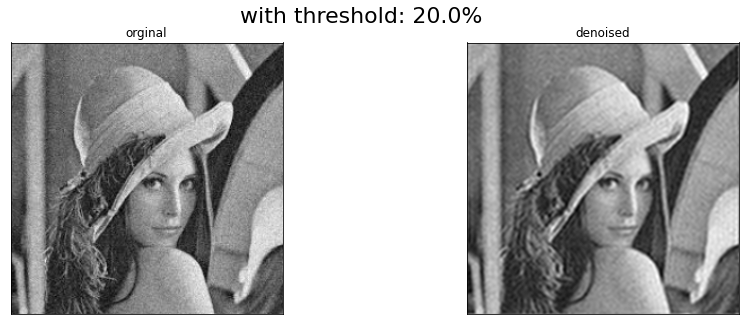

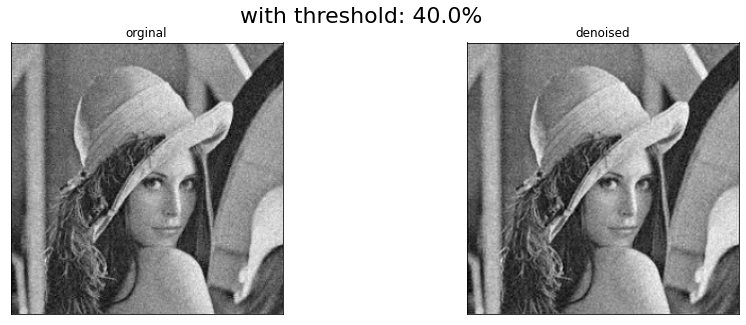

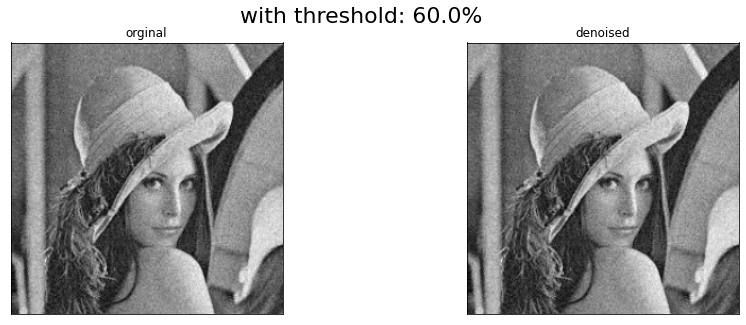

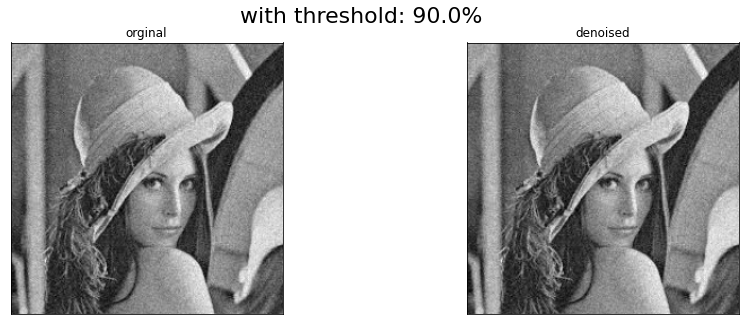

In [81]:
transformed_original = fft2(img)

thresh_factors = [0.03, 0.04, 0.05, 0.06, 0.075, 0.08, 0.1, 0.2,0.4,0.6,0.9]
for keep_fraction in thresh_factors:
    transformed = transformed_original.copy()
    r, c = transformed.shape
    transformed[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
    transformed[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0  

    back =  inverse_fft2(transformed).real
    plt.figure(figsize=(15,5))
    
    plt.subplot(121), plt.imshow(img, cmap="gray")
    plt.title("orginal"), plt.xticks([]), plt.yticks([])
    
    plt.subplot(122), plt.imshow(back, cmap="gray")
    plt.title("denoised"), plt.xticks([]), plt.yticks([])
    plt.suptitle("with threshold: {}%".format(100*keep_fraction),fontsize=22)
    
    plt.show()

In [29]:
y = np.fft.fftfreq(10, 1)
sy = fftshift_1d(y)


In [30]:
np.allclose(sy, np.fft.fftshift(y))


True

In [74]:
m=np.random.random([128,128])

In [37]:
np.allclose(fftshift_2d(m), np.fft.fftshift(m))

True

In [38]:
np.allclose(fftshift_2d(m, 0), np.fft.fftshift(m, 0))


True

In [39]:
np.allclose(fftshift_2d(m, 1), np.fft.fftshift(m, 1))


True